# Sentiment Analysis

## Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

## EDA -Exploratory data analysis

In [2]:
tweets_df = pd.read_csv('C:/Users/Jharna Yadav/Documents/Internship/TCS/SentimentAnanlysis/data/Tweets.csv')

In [3]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets_df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [5]:
tweets_df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [6]:
tweets_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
print("Percentage null or na values in df")
((tweets_df.isnull() | tweets_df.isna()).sum() * 100 / tweets_df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [8]:
tweets_df["tweet_coord"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
14635    NaN
14636    NaN
14637    NaN
14638    NaN
14639    NaN
Name: tweet_coord, Length: 14640, dtype: object

## Deleting all unnecessary columns

In [9]:
del tweets_df['tweet_coord']
del tweets_df['airline_sentiment_gold']
del tweets_df['negativereason_gold']
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Seperating Numerical and categorical columns

In [10]:
categorical_cols = [cols for cols in tweets_df.columns if tweets_df[cols].dtype == "object"]
numerical_cols = [ cols for cols in tweets_df.columns if tweets_df[cols].dtype != "object"]
print("List of categorical :", categorical_cols)
print("List of numerical :", numerical_cols)

List of categorical : ['airline_sentiment', 'negativereason', 'airline', 'name', 'text', 'tweet_created', 'tweet_location', 'user_timezone']
List of numerical : ['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']


In [11]:
tweets_df[numerical_cols].tail(10)


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
14630,569588473050611712,1.0000,NaN,0
14631,569588464896876545,1.0000,1.0000,0
14632,569587813856841728,0.6760,0.0000,0
14633,569587705937600512,1.0000,1.0000,0
14634,569587691626622976,0.6684,0.6684,0
14635,569587686496825344,0.3487,0.0000,0
14636,569587371693355008,1.0000,1.0000,0
14637,569587242672398336,1.0000,NaN,0
14638,569587188687634433,1.0000,0.6659,0
14639,569587140490866689,0.6771,0.0000,0


In [12]:
tweets_df[categorical_cols].head()

,airline_sentiment,negativereason,airline,name,text,tweet_created,tweet_location,user_timezone
0,neutral,NaN,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,NaN,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,NaN,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,Bad Flight,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,Can't Tell,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
tweets_df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [14]:
def unique_vals(df):
    for col in categorical_cols:
        print("These of unique values of" , col, df[col].unique().size)
unique_vals(tweets_df)

These of unique values of airline_sentiment 3
These of unique values of negativereason 11
These of unique values of airline 6
These of unique values of name 7701
These of unique values of text 14427
These of unique values of tweet_created 14247
These of unique values of tweet_location 3082
These of unique values of user_timezone 86


Dropping neutral rows

In [15]:
# dropping neutral columns
tweets_df =tweets_df[tweets_df["airline_sentiment"] != "neutral"]
tweets_df.head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,2015-02-24 10:30:40 -0800,NYC,America/New_York
12,570289584061480960,positive,1.0000,NaN,NaN,Virgin America,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...,2015-02-24 10:30:06 -0800,NYC,America/New_York
13,570287408438120448,positive,0.6451,NaN,NaN,Virgin America,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,2015-02-24 10:21:28 -0800,NaN,Eastern Time (US & Canada)


## Encoding the target variable 

In [16]:
tweets_df["airline_sentiment" ] = tweets_df["airline_sentiment"].apply(lambda x : 0 if x == "negative" else 1)

In [17]:
tweets_df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [18]:
## 79.52% of the sentiments are negative
tweets_df["airline_sentiment"].value_counts(normalize=True)


airline_sentiment
0    0.795252
1    0.204748
Name: proportion, dtype: float64

In [19]:
new_df =tweets_df.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count()

In [20]:
new_df

airline         airline_sentiment
American        0                    1960
                1                     336
Delta           0                     955
                1                     544
Southwest       0                    1186
                1                     570
US Airways      0                    2263
                1                     269
United          0                    2633
                1                     492
Virgin America  0                     181
                1                     152
Name: airline_sentiment, dtype: int64

## Data Visualization

<Axes: xlabel='airline', ylabel='count'>

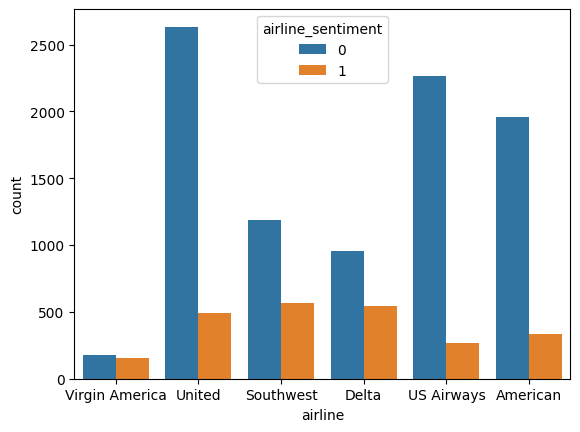

In [21]:
sns.countplot(tweets_df, x="airline", hue = "airline_sentiment")

In [22]:
neg_sents = tweets_df.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count().iloc[::2]
neg_sents
total_sents= tweets_df.groupby(["airline"])["airline_sentiment"].count()

In [23]:
perc = [round(x/y, 2) for x, y in zip(neg_sents, total_sents) ]
perc

[0.85, 0.64, 0.68, 0.89, 0.84, 0.54]

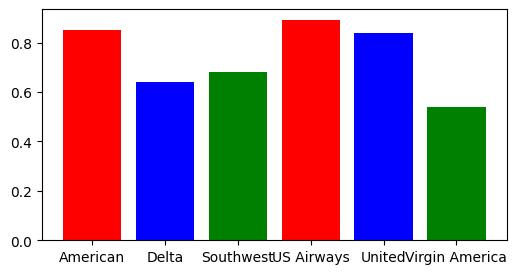

In [24]:
plt.figure(figsize = (6, 3))
plt.bar( total_sents.index,  perc, color= ["r", "b", "g", "r","b", "g" ])
plt.show()

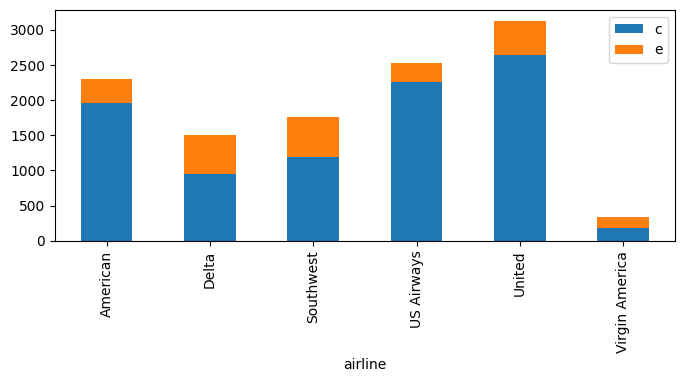

In [25]:
figure_2 = tweets_df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(8,3))
plt.legend("center")

In [26]:
from wordcloud import WordCloud,STOPWORDS

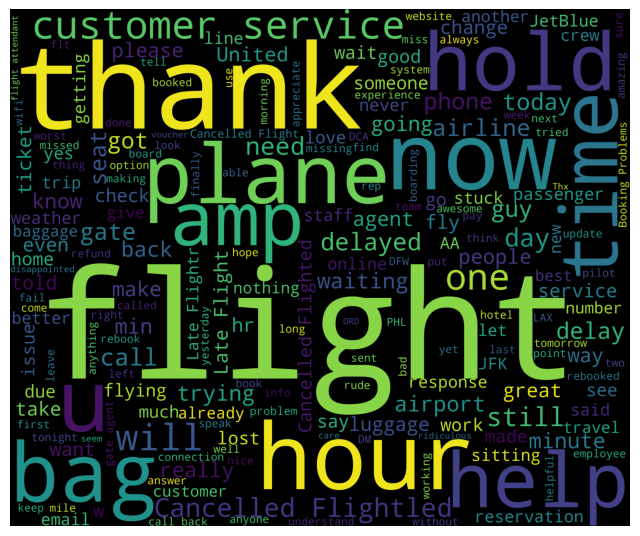

In [27]:

words = ' '.join(tweets_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Cleaning the tweets
Removing special characters, numbers etc

In [28]:
import regex as re

In [29]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [30]:
nltk.download('stopwords')
tweets_df['clean_tweet']=tweets_df['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to C:\Users\Jharna
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Splitting training and test data set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = tweets_df.clean_tweet
y = tweets_df.airline_sentiment

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


## Converting tweets to numerical values using count vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [34]:
import pickle

## Pickling the function required for text cleaning and count vectorizer

In [35]:
#Pickling the function required for text cleaning and count vectorizer
# text_transform = (tweet_to_words, vect)
txt_file = open("text_trans.pkl", "wb")
pickle.dump(vect, txt_file)

txt_file.close()

In [36]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

## training SVM model with linear kernel
### Support Vector Classification-wrapper around SVM

In [37]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state = 10)
svc.fit(x_train_dtm, y_train)
#predicting output for test data
pred = svc.predict(x_test_dtm)

## Evaluation of SVM

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
accuracy_score(y_test,pred)

0.9081774081774082

In [40]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2194,  129],
       [ 136,  427]], dtype=int64)

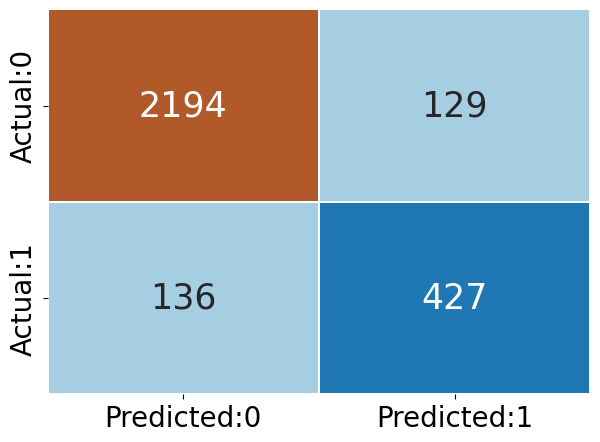

In [41]:
plt.rcParams['figure.figsize'] = [7,5]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Applying Decision Tree and simple neural network

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(x_train_dtm,y_train)
y_pred_DT = clf_dt.predict(x_test_dtm)

In [44]:
print("Accuracy:",accuracy_score(y_test, y_pred_DT))

Accuracy: 0.8541233541233542


In [45]:
import tensorflow as tf

In [46]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [47]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])

In [48]:
xa = x_train_dtm.toarray()

In [49]:
model_1.fit(xa, y_train, epochs = 5)

Epoch 1/5


271/271 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.8177
Epoch 2/5
271/271 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8668
Epoch 3/5
271/271 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8809
Epoch 4/5
271/271 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8886
Epoch 5/5
271/271 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.8908


In [50]:
model_1.evaluate(xa, y_train)

271/271 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.8930


[0.23000389337539673, 0.8930098414421082]

## Pickling the Model

In [51]:
models = (svc, clf_dt, model_1)

model_file = open("models.pkl", "wb")
pickle.dump(models, model_file)

In [52]:
model_file.close()